In [1]:
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils import to_categorical
import cv2
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/Colab Notebooks/food_data

/content/drive/MyDrive/Colab Notebooks/food_data


In [4]:
ls


food_dataset.zip


In [6]:
!unzip food_dataset.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: food11/train/hamburger/2722745.jpg  
  inflating: food11/train/hamburger/272642.jpg  
  inflating: food11/train/hamburger/2726558.jpg  
  inflating: food11/train/hamburger/2738245.jpg  
  inflating: food11/train/hamburger/2745577.jpg  
  inflating: food11/train/hamburger/2745917.jpg  
  inflating: food11/train/hamburger/2754513.jpg  
  inflating: food11/train/hamburger/2756964.jpg  
  inflating: food11/train/hamburger/2762170.jpg  
  inflating: food11/train/hamburger/2766731.jpg  
  inflating: food11/train/hamburger/2771605.jpg  
  inflating: food11/train/hamburger/277584.jpg  
  inflating: food11/train/hamburger/2777938.jpg  
  inflating: food11/train/hamburger/2790429.jpg  
  inflating: food11/train/hamburger/279510.jpg  
  inflating: food11/train/hamburger/2797268.jpg  
  inflating: food11/train/hamburger/279729.jpg  
  inflating: food11/train/hamburger/2808308.jpg  
  inflating: food11/train/hamburger/281725.jpg 

In [9]:
from pathlib import Path
path = Path('/content/drive/MyDrive/Colab Notebooks/food_data/food11/train')
class_names = list(path.glob('*'))
for class_name in class_names:
  print(class_name)
# print(class_names)
# print(str(class_names[0]).split('/')[-1])
# print(list(class_names[0].glob('*'))[0])

/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/apple_pie
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/cheesecake
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/chicken_curry
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/french_fries
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/fried_rice
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/hamburger
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/hot_dog
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/ice_cream
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/omelette
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/pizza
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/sushi


In [10]:
X = []
y = []
food = ['sushi', 'pizza', 'omelette',   'ice_cream',  'hot_dog','hamburger',  'fried_rice',   'french_fries',  'chicken_curry',  'cheesecake',  'apple_pie']
# food.index('dandelion')
for class_name in class_names:
  print(class_name)
  images_path = list(class_name.glob('*'))
  for im_path in images_path:
    img = cv2.imread(str(im_path))
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64,64))
    label = food.index(str(class_name).split('/')[-1])
    X.append(img)
    y.append(label)

/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/apple_pie
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/cheesecake
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/chicken_curry
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/french_fries
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/fried_rice
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/hamburger
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/hot_dog
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/ice_cream
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/omelette
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/pizza
/content/drive/MyDrive/Colab Notebooks/food_data/food11/train/sushi


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

In [12]:
# X_train = X_train.reshape(60000, 28*28)
X_train = X_train.astype('float32')/255
# X_test = X_test.reshape(10000, 28*28)
X_test = X_test.astype('float32')/255

In [14]:
from keras.utils import to_categorical
y = to_categorical(y)
print(y.shape)

(9900, 11)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(7920, 64, 64, 3)
(1980, 64, 64, 3)
(7920, 11)
(1980, 11)


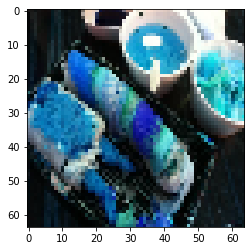

In [17]:
plt.imshow(X_train[8])
print(y_train[8])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# ANN
model = models.Sequential()
model.add(layers.Flatten(input_shape=[64, 64, 3]))

model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 12288)             0         
                                                                 
 dense_24 (Dense)            (None, 1000)              12289000  
                                                                 
 dense_25 (Dense)            (None, 500)               500500    
                                                                 
 dense_26 (Dense)            (None, 200)               100200    
                                                                 
 dense_27 (Dense)            (None, 100)               20100     
                                                                 
 dense_28 (Dense)            (None, 50)                5050      
                                                                 
 dense_29 (Dense)            (None, 10)               

In [20]:
# CNN
from keras import models, layers
from keras.layers import Flatten, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential,Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)       

In [21]:
model.fit(X_train,y_train,epochs=400,batch_size=128)

Epoch 1/400
62/62 [==============================] - 11s 22ms/step - loss: 12.1584 - accuracy: 0.1167
Epoch 2/400
62/62 [==============================] - 1s 18ms/step - loss: 2.4077 - accuracy: 0.1471
Epoch 3/400
62/62 [==============================] - 1s 17ms/step - loss: 2.3789 - accuracy: 0.1737
Epoch 4/400
62/62 [==============================] - 1s 17ms/step - loss: 2.2627 - accuracy: 0.2174
Epoch 5/400
62/62 [==============================] - 1s 17ms/step - loss: 2.0619 - accuracy: 0.2740
Epoch 6/400
62/62 [==============================] - 1s 17ms/step - loss: 1.8674 - accuracy: 0.3588
Epoch 7/400
62/62 [==============================] - 1s 17ms/step - loss: 1.6769 - accuracy: 0.4330
Epoch 8/400
62/62 [==============================] - 1s 17ms/step - loss: 1.4045 - accuracy: 0.5319
Epoch 9/400
62/62 [==============================] - 1s 17ms/step - loss: 1.1601 - accuracy: 0.6150
Epoch 10/400
62/62 [==============================] - 1s 17ms/step - loss: 0.8704 - accuracy: 0.71

In [22]:
model.evaluate(X_test, y_test)

62/62 [==============================] - 1s 6ms/step - loss: 294.8155 - accuracy: 0.2798


[294.8154602050781, 0.2797979712486267]

In [23]:
file = "/content/drive/MyDrive/Data/Flower_weight.sav"

In [24]:
import pickle
pickle.dump(model, open(file, 'wb'))

In [25]:
loaded_model = pickle.load(open(file, 'rb'))

In [ ]:
# n = 1

n += 1
print(f'{n}/{len(y_test)}')
plt.imshow(X_test[n])
pred = loaded_model.predict(X_test[n].reshape((1, 128, 128, 3)))
print(f'Predict: {face_names[pred.argmax()]}  ({int(pred[0][pred.argmax()]*100)}%)')
print('True_label: ', face_names[y_test[n].argmax()])

(64, 64, 3)
1/1 [==============================] - 0s 15ms/step
sushi


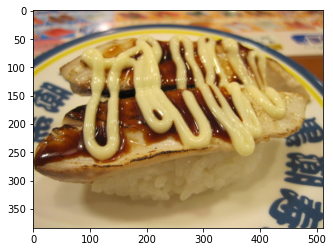

In [32]:
import cv2
# url = 'download (5).jpeg'
# n=2
n+=1
images_test = list(Path('/content/drive/MyDrive/Colab Notebooks/food_data/food11/test/sushi').glob('*g'))
# print(images_test)
url = images_test[n]
image = cv2.imread(str(url))
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = cv2.resize(img, (64,64))
img = img.astype('float32')/255
print(img.shape)
pred = model.predict(img.reshape((1, 64, 64, 3)))
print(food[pred.argmax()])